Steven Raaijmakers & Marcus van Bergen

### Exercise Affine Transform
For the affine transform we want to warp an image by mapping 3 points:

$x_1, y_1 \rightarrow (0, 0)$

$x_2, y_2 \rightarrow (width − 1,0) $

$x_3, y_3 \rightarrow (0,height−1)$

We used openCV's warpAffine method. In order to use this method we need a transformation matrix p. The transformation matrix can be reconstructed:

The affine matrix for mapping one point:

$$
\left(\begin{array}{cc} 
h_{00} & h_{01} & t_x \\
h_{10} & h_{11} & t_y \\
0 & 0 & 1 
\end{array}\right)
\left(\begin{array}{cc} 
x \\ 
y \\
1 
\end{array}\right)
=
\left(\begin{array}{cc} 
x' \\ 
y' \\
1 
\end{array}\right)
$$ 

We can rewrite this matrix:

$$
\left(\begin{array}{cc} 
x & y & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & x & y & 1
\end{array}\right)
\left(\begin{array}{cc} 
h_{00} \\
h_{01} \\
t_x \\
h_{10} \\
h_{11} \\
t_y
\end{array}\right)
=
\left(\begin{array}{cc} 
x' \\ 
y' \\
\end{array}\right)
$$ 

Since this is only for mapping $x, y$ to $x', y'$ and we need three points, we need to reconstruct the first matrix to map three points: $x_1, y_1 \rightarrow x'_1, y'_1$, $x_2, y_2 \rightarrow x'_2, y'_2$, $x_3, y_3 \rightarrow x'_3, y'_3$, 

$$
\left(\begin{array}{cc} 
x_1 & y_1 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & x_1 & y_1 & 1 \\
x_2 & y_2 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & x_2 & y_2 & 1 \\
x_3 & y_3 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & x_3 & y_3 & 1 
\end{array}\right)
\left(\begin{array}{cc} 
h_{00} \\
h_{01} \\
t_x \\
h_{10} \\
h_{11} \\
t_y
\end{array}\right)
=
\left(\begin{array}{cc} 
x_1' \\ 
y_1' \\
x_2' \\
y_2' \\
x_3' \\
y_3'
\end{array}\right)
$$ 

The first matrix is M, and filled with user specified points. The second matrix contains the coordinates of mappings which will result in the last matrix which contains the coordinates

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [18]:
def affineTransform(f, x1, y1, x2, y2, x3, y3, width, height):
    M = np.matrix([
            [x1, y1, 1, 0, 0, 0],
            [0, 0, 0, x1, y1, 1],
            [x2, y2, 1, 0, 0, 0],
            [0, 0, 0, x2, y2, 1],
            [x3, y3, 1, 0, 0, 0],
            [0, 0, 0, x3, y3, 1]])
    
    q = np.matrix([
            [0],
            [0],
            [width - 1],
            [0],
            [0],
            [height - 1]])

    p = np.linalg.lstsq(M, q)[0].reshape(2, 3)

    return cv2.warpAffine(f, p, (width, height))

With the warp function we map certain points to the predefined points. The first point will be mapped to the topleft corner, the second point to the topright corner and the third point will be mapped to the bottom left corner.

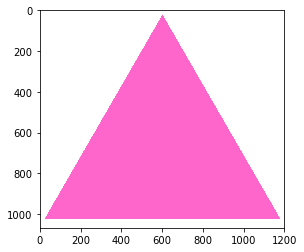

In [19]:
image = plt.imread("images/triangle.png")
plt.imshow(image)
plt.show()

This triangle has three edges: (600, 30), (1100, 1020), (30, 1020). If we use our affine transform these three points will be warped....

Which results in:

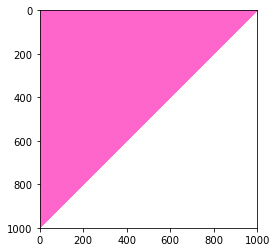

In [20]:
image_a = affineTransform(image, 600, 30, 1100, 1020, 30, 1020, 1000, 1000)
plt.imshow(image_a)
plt.show()

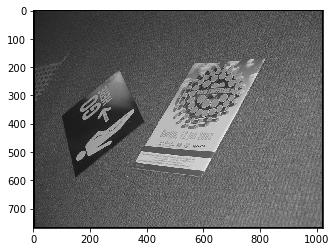

In [21]:
flyer = plt.imread("images/flyer.png")
plt.imshow(flyer)
plt.show()

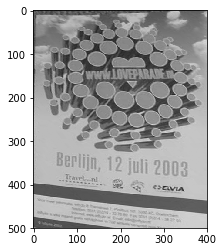

In [25]:
flyer_warp = affineTransform(flyer, 570, 180, 820, 170, 350, 555, 400, 500)
plt.imshow(flyer_warp)
plt.show()

### Exercise Perspective Transform

For the perspective tranformation we want to warp a quadrilateral with vertices:
$(x_i, y_i)$ in the image $f$ to the points $(x'_i,y'_i)$. This quadriateral can be of any shape or size, so we warp it to a get it into a regular perspective.

The coordinates will be mapped to the following location:

<img width="300" src="images/map.png">



We know the transformation matrix can be defined with:
$ \widetilde{X'} \sim P \widetilde{X}$

This formal defintion can be rewritten as 
<img width="400" src="images/form.png">

We now want to find a $p$ which minimizes $\left|\left| Mp \right|\right|$, with constraint $\left|\left| p \right|\right| = 1$. Using the SVD operation we can get $V^{T}$

<img width="200" src="images/svd1.png">
With orthogonality we can write $q = V^T p$ keeps parameters:

<img width="200" src="images/svd1.png">

Which eventually allows us to define $p$ as $p = Vq$
 


In [22]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [23]:
def perspectiveTransform(f, x1, y1, x2, y2, x3, y3, x4, y4, width, height):
    # coordinates to where there will be mapped to
    x1_d, y1_d = 0, 0
    x2_d, y2_d = width, 0
    x3_d, y3_d = 0, height
    x4_d, y4_d = width, height

    # homogenious array M
    M = np.array([
    [x1, y1, 1, 0, 0, 0, -x1_d * x1, -x1_d * y1, -x1_d],
    [0, 0, 0, x1, y1, 1, -y1_d * x1, -y1_d * y1, -y1_d],
    [x2, y2, 1, 0, 0, 0, -x2_d * x2, -x2_d * y2, -x2_d],
    [0, 0, 0, x2, y2, 1, -y2_d * x2, -y2_d * y2, -y2_d],
    [x3, y3, 1, 0, 0, 0, -x3_d * x3, -x3_d * y3, -x3_d],
    [0, 0, 0, x3, y3, 1, -y3_d * x3, -y3_d * y3, -y3_d],
    [x4, y4, 1, 0, 0, 0, -x4_d * x4, -x4_d * y4, -x4_d],
    [0, 0, 0, x4, y4, 1, -y4_d * x4, -y4_d * y4, -y4_d]])

    # decomposition to get V^t
    _, _, V = np.linalg.svd(M)

    # Last colomn of V will be reshaped to a 3x3 which will be used
    # for the warp
    p = V[-1]
    p = (np.reshape(p, (3,3)))

    # return new warped image
    return cv2.warpPerspective(f, p, (width, height))

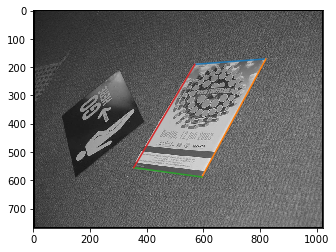

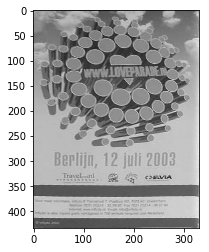

In [24]:
img_pers = plt.imread("images/flyeronground.png")
x1, y1 = 570, 190
x2, y2 = 821, 171
x3, y3 = 354, 555
x4, y4 = 595, 588

plt.imshow(img_pers)

#plot lines to show the quadrilateral
plt.plot([x1, x2], [y1, y2])
plt.plot([x2, x4], [y2, y4])
plt.plot([x4, x3], [y4, y3])
plt.plot([x3, x1], [y3, y1])
plt.show()

# transformed image
img_warp = perspectiveTransform(img_pers, x1, y1, x2, y2, x3, y3, x4, y4, width=330, height=434)
plt.imshow(img_warp)
plt.show()